# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

Objective:
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.

### Data Dictionary

Data Dictionary

1. order_id: Unique ID of the order
2. customer_id: ID of the customer who ordered the food
3. restaurant_name: Name of the restaurant
4. cuisine_type: Cuisine ordered by the customer
5. cost_of_the_order: Cost of the order
6. day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
7. rating: Rating given by the customer out of 5
8. food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
9. delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information.

### Let us start by importing the required libraries

In [53]:
# Write your code here to import necessary libraries for the project
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

### Understanding the structure of the data

In [54]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [55]:
# Dataset import from local library
df = pd.read_csv('foodhub_order.csv')

In [56]:
# To view the first 5 rows 
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [57]:
# "shape" gives the total number of rows and columns of a dataset 
df.shape

(1898, 9)

#### Observations: 
There are 1898 rows and 9 columns. 


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 

1. Column order_id , customer_id , food_preparation_time , delivery_time are of integer Datatype
2. Column restaurant_name, cuisine_type, day_of_the_week, rating is of String datatype                                           
3. Column cost_of_the_order is of float Datatype     


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [59]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no null values present in the dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [60]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
1. Order Id is similar to index
2. Customer ID is like an identification ID of each customer
3. Cost of the order:
    a. Min = 4.47
    b. Max = 35.41 
    c. Avg = 16.49 
5. Food preparation time once an order is placed :
    a. Min time : 20 minutes
    b. Max time : 35 minutes
    c. Average  : 27.3 minutes
6. Delivery Time:
    a. Min = 15 mins
    b. Max = 33 mins
    c. Avg = 24.16 mins

### **Question 5:** How many orders are not rated? [1 mark]

In [61]:
#Check for all records with rating == 'Not given' and sum it
(df['rating'] == 'Not given').sum()

736

#### Observations:
There are total of 736 out of 1898 orders that are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [62]:
## In the given Dataset , we have already analysed 
# 1. Shape
# 2. Data types of each column
# 3. Total no. of null values
# 4. Statistical analysis of the data distribution inthe dataset

In [63]:
# To check the no.of unique values in each of the column 
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

#### Observation :
Ignoring the below columns in Univriant analysis because :

1. order_id - It’s a unique identifier for each order. No meaningful pattern, distribution, or statistical insight
2. customer_id - Similar to order_id, this alone doesn't carry interpretable information. It is useful while combining with other data for analysis
3. restaurant_name - Too many unique restaurants so count plot becomes over crowded and hard to interpret.It is useful while combining with other data for analysis

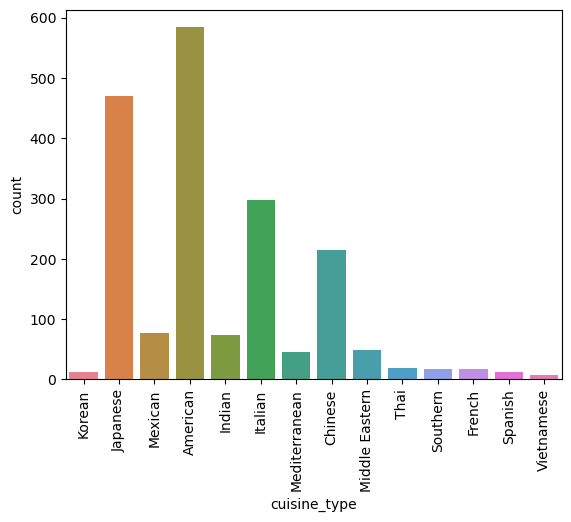

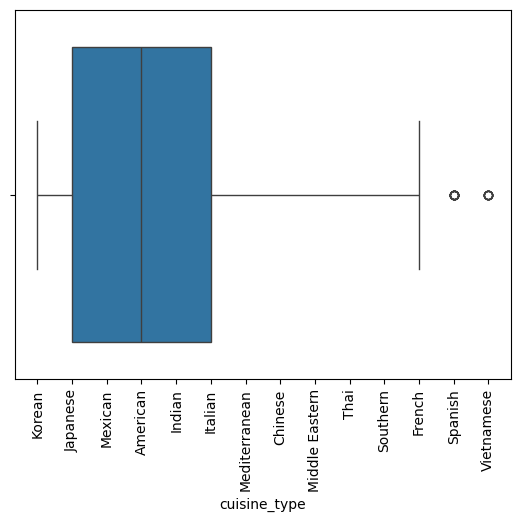

In [64]:
# Univariant analysis for cuisine_type

sns.countplot(data=df,x='cuisine_type',hue='cuisine_type')
plt.xticks(rotation=90) 
plt.show()
sns.boxplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

#### Observation:
Count plot observation:
Most popular cusines by order counts are:
1. American
2. Japanese
3. Italian
4. Chinese

Box plot observtions:
1. The data is right skewed(positively skewed)
2. The box IQR is concentrated around Japanes, Mexican, American, Indian and Italian which suggests these are among the most common cuisines in dataset

Outliers:
1. Spanish and Vietnamese are marked as outliers , which means they are among the least preferred cusines in dataset

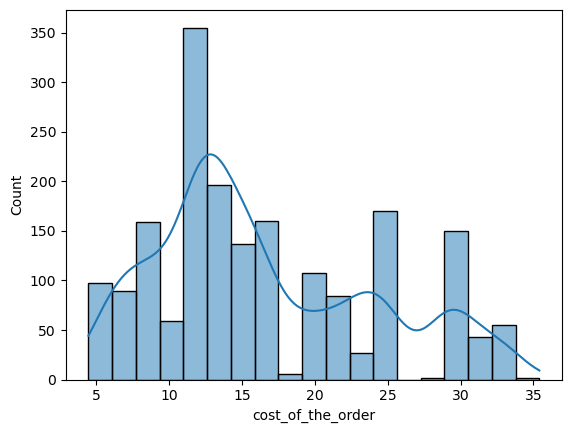

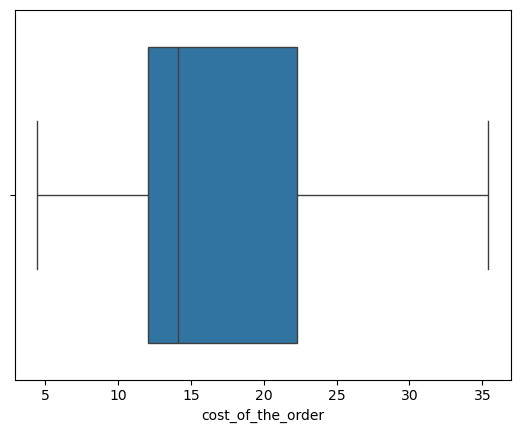

In [65]:
# Univariant analysis for cost_of_the_order

sns.histplot(data=df,x='cost_of_the_order',kde=True)

plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

#### Observation:
Histplot Observation:
1. Distribution is right skewed
2. Most orders are between 11 - 14
3. Highest peak occurs between 10 - 12

Box plot Observtion:
1. Distribution is right skewed
2. Median occurs are 13 - 14
3. No outliers marked in graph

In [66]:
# Univariant analysis for day_of_the_week

df['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

<Axes: xlabel='day_of_the_week', ylabel='count'>

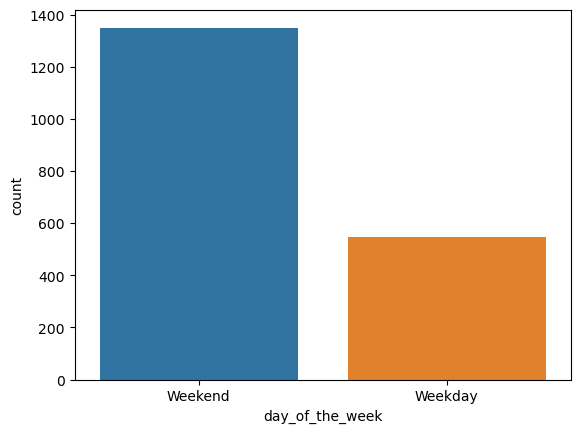

In [67]:
# Univariant analysis for day_of_the_week

sns.countplot(data=df, x='day_of_the_week', hue='day_of_the_week')

#### Obeservations :
1. There are 2 unique values in the column - Weekday and Weekend.
2. Total order counts on Weekend =  13513. Total order counts on Weekday =   547

 The distribution shows that number of order placed on weekends is more than double the number of orders placed on weekdays.

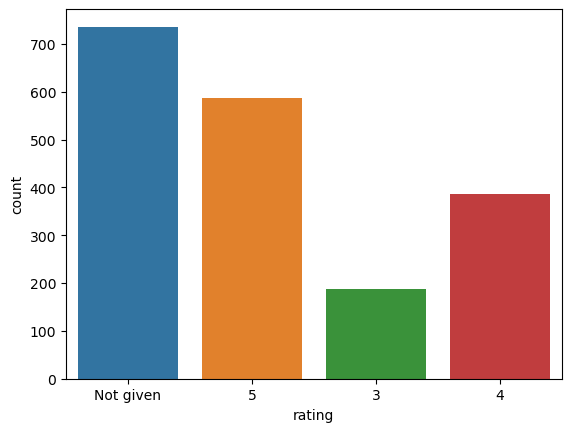

In [68]:
# Univariant analysis for rating

sns.countplot(data=df, x='rating', hue='rating');

#### Observations
From the graph above:
1. More than 700 customers did not give rating for the order placed. 
2. Nearly 600 customers have given 5 rating
3. Nearly 400 customers have given 4 rating 
4. Nearly 200 customers have given 3 rating

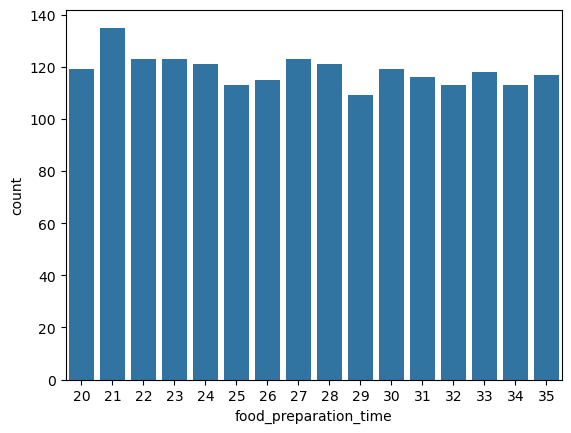

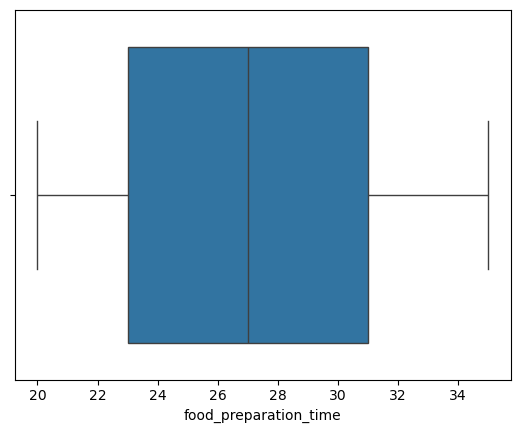

In [69]:
# Univariant analysis for food_preparation_time

sns.countplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Observations
1. Food preparation times are evenly distributed which means the restaurants are consistent in food preparatio timings2. Average food preparation time is almost equal to the median food preparation time, which means  the distribution is nearly symmetrical. 3. The food preparation timem is distributed between 20 and 35 minutes
4. No outliers are present, which means the preparation times are consistent.

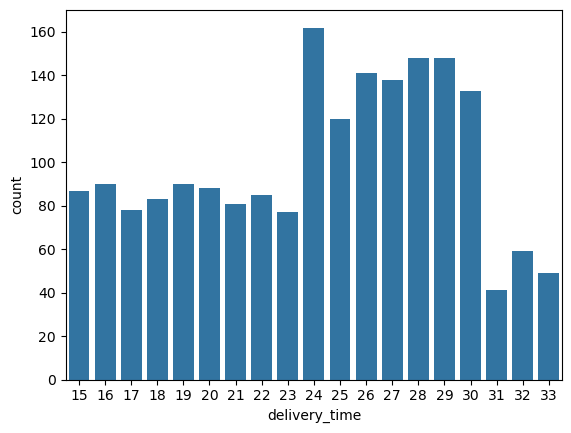

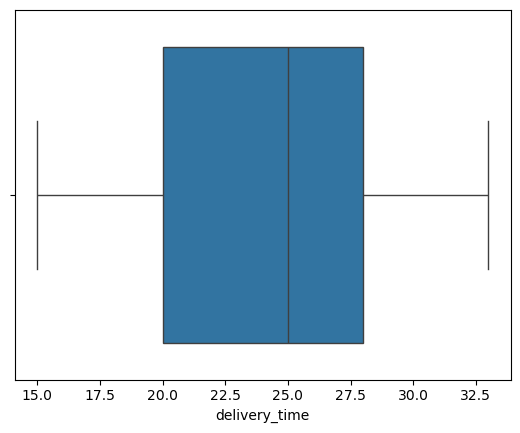

In [70]:
# Univariant analysis for Delivery Time

sns.countplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

#### Observations
For Count plot:
1. Distribution is uneven 
2. There seems to be high counts for delivery time ranging from 24 - 30 minutes
3. After 30 minutes, the counts drop significantly
4. Most common delivery time is 24 minutes

For Box plot:
1. The distribution apperas to be slightly left skewed
2. No outliers marked in the graph
3. Median delivery time is around 24–25 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [71]:
# Get count by doing a groupby on restaurant_name for all order_id. Sort it descending

top5 = df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending = False).head(5)
print(top5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


#### Observations:
The top 5 restaurants in terms of the number of orders received are :
1. Shake Shack
2.  The Meatball Shop
3.  Blue Ribbon Sushi
4.  Blue Ribbon Fried Chicken
5.  Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [72]:
# copy all weekend data in a dataframe "weekend"
weekend = df[df['day_of_the_week'] == 'Weekend']

#Get count by doing a groupby on cuisine_type for all order_id. Sort it descending
top_weekend = weekend.groupby(['cuisine_type'])['order_id'].count().sort_values(ascending = False).head(5)
print(top_weekend)

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: order_id, dtype: int64


#### Observations:
The most popular cuisine on weekends are :
1. American
2. Japanese
3. Italian
4. Chinese
5. Mexican      

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [73]:
#to get the leght of dataframe 
len(df)

1898

In [74]:
# create a a new dataframe df1 with all orde cost > 20 and divide it with total len of df and get percentage
df1 = df[df['cost_of_the_order'] > 20]
percentage = (len(df1)/len(df)*100)
print(percentage)

29.24130663856691


#### Observations:
29.2% of all the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [75]:
#Get mean of the Delivery time 

df['delivery_time'].mean()   

24.161749209694417

#### Observations:
The mean order delivery time = 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [76]:
# Check the value counts on customer_id and return top 3 values
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
Top 3 most frequent customers & number of orders they placed are:
1. CustomerID 52832 has placed 13 orders
2. CustomerID 47440 has placed 10 orders
3. CustomerID 83287 has placed 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


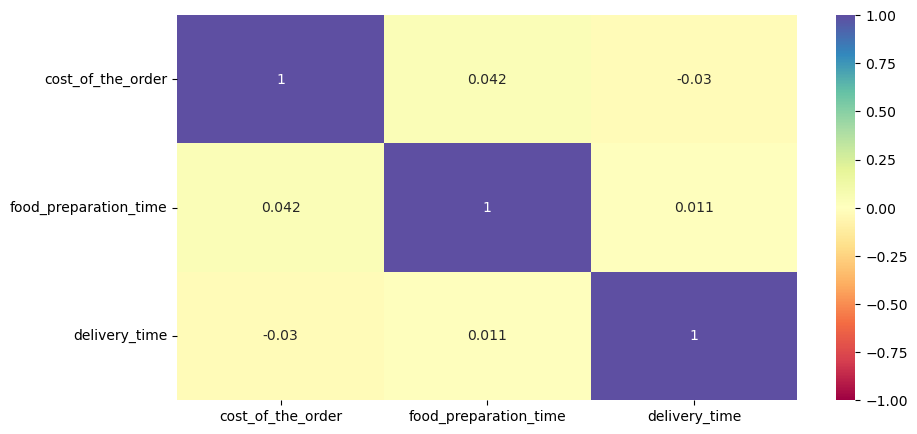

In [77]:
# To understand the correlation between the 3 numerical values in the dataset 
heatmap =  df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].copy()
plt.figure(figsize=(10,5))
sns.heatmap(heatmap.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

### Observation
Cost of order with
1. food_preparation_time : 0.042, Very weak positive correlation.
2. delivery_time : -0.03 , Very weak negative correlation.

food_preparation_time with
1. delivery_time : 0.011, Very weak positive correlation.

Overall Observation :
1. More costly orders are delivered a bit faster
2. More costly orders take slightly more time to prepare
3. Preparation time does not have much effect on delivery time


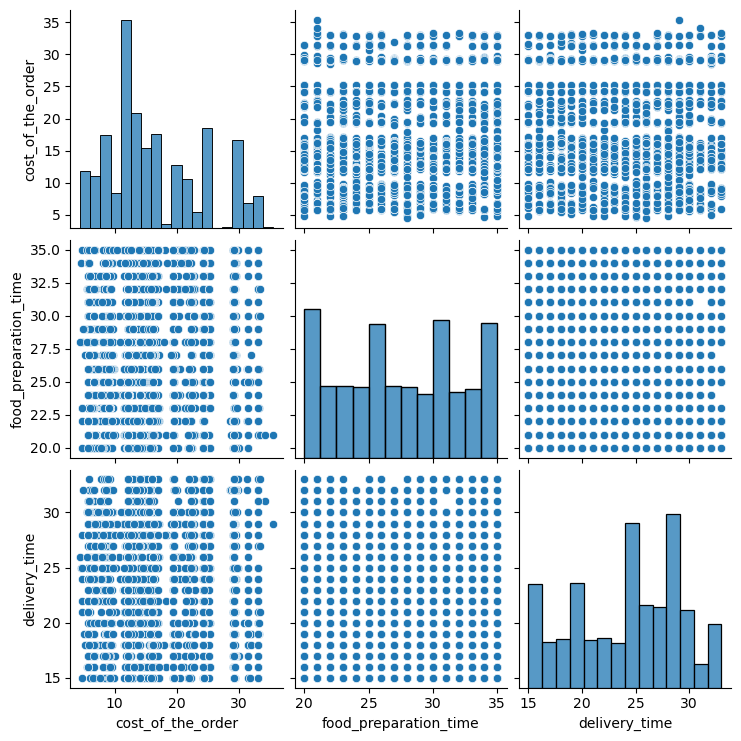

In [78]:
# Pair plot to visualize relationships between cost_of_the_order, food_preparation_time, delivery_time
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])

#### Observations:
Count plot observations :
COST OF ORDER:
1. 
Distribution is right skewe2. d
Most orders are between 11 - 3. 14
Highest peak occurs between 10 

FOOD PREPARATION TIME:

1. Food preparation times are evenly distributed which means the restaurants are consistent in food preparatio timings
2. Average food preparation time is almost equal to the median food preparation time, which means  the distribution is nearly symmetrical. 
3. The food preparation timem is distributed between 20 and 35 minutes

DELIVERY TIME:
1. Distribution is uneven 
2. There seems to be high counts for delivery time ranging from 24 - 30 minutes
3. After 30 minutes, the counts drop significantly
4. Most common delivery time is 24 minutes- 12

Scatter plot Observtion :
COST OF ORDER Vs. FOOD PREPARATION TIME
1. No clear correlation
2. Points are scattered widely
3. Cost and food preparation time are not impacting each other

COST OF ORDER VS DELIVERY TIME:
1. No clear correlation
2. Both are independent of each other

FOOD PREPARATION TIME Vs.  DELIVERY TIME:
1. No clear relationship noticed
2. Food preparation time doesnt impact delivery time much


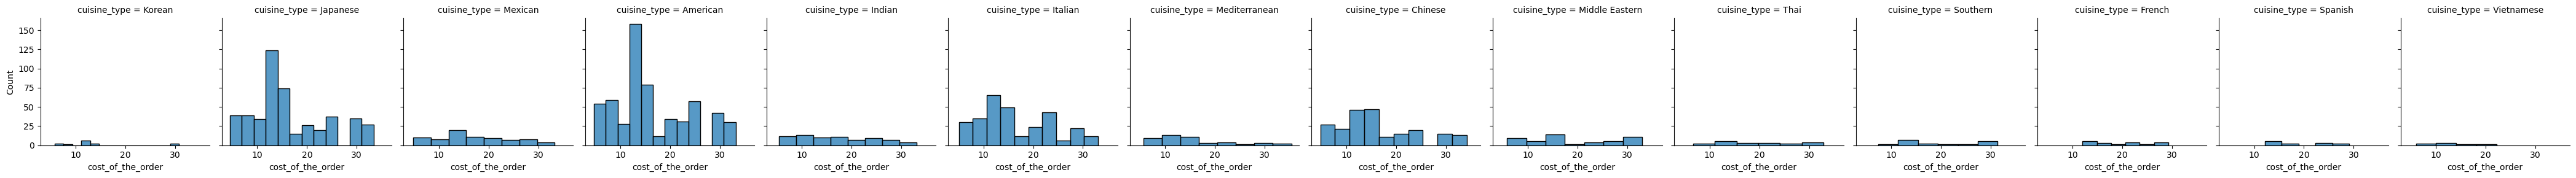

In [79]:
g = sns.FacetGrid(df, col="cuisine_type")
g.map(sns.histplot, "cost_of_the_order");

#### Observation:

1. American has the tallest bar on the counts
2. Next is Japanese

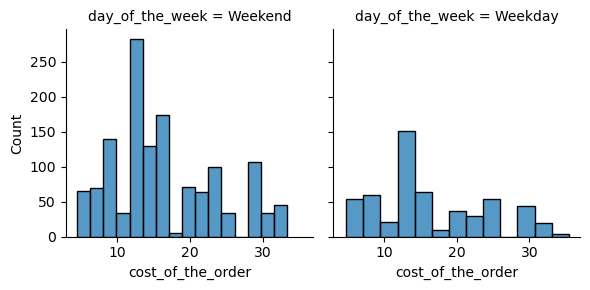

In [80]:
g = sns.FacetGrid(df, col="day_of_the_week")
g.map(sns.histplot, "cost_of_the_order");

#### Observation:

1. Weekend shows much higer counts than weekdays
2. The peak counts reach more than 250 in weekends and around 150 on weekdays
3. More no.of low cost orders are being placed on weekend

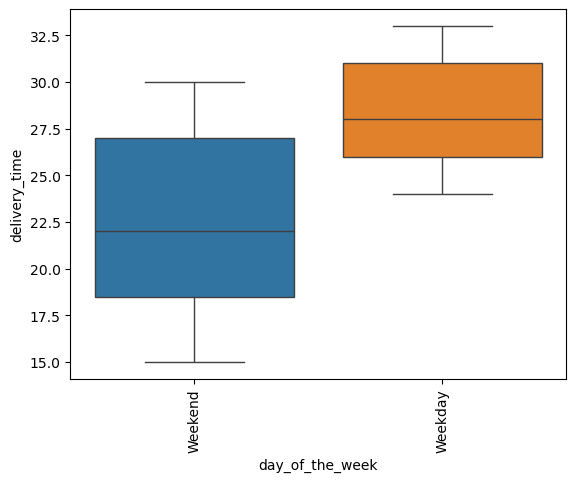

In [81]:
# analysis between day of the week and delivery time
#plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = "day_of_the_week", y = "delivery_time", hue = "day_of_the_week")
plt.xticks(rotation = 90)
plt.show()

#### Observatiom

Delivery time seem to be lesser for weekends than weekdays

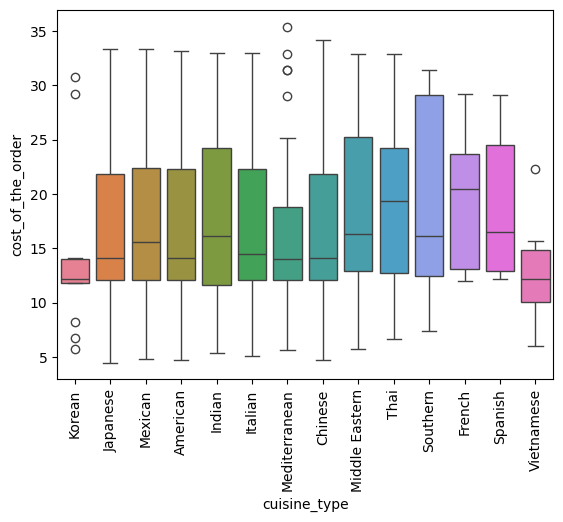

In [82]:
#Box plot to to visually compare the distribution data between cuisine_type and its cost

sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type')
plt.xticks(rotation=90) 
plt.show()

### Obersvations

1. Vietnamese and Korean have the lowest median cost among all cuisines, a smaller box indicating low variability in order cost.2. Indian, Middle Eastern, and Southern have high variability in the cost of orders for these cuisines.3. Korean, Mediterranean, and Vietnamese cuisines have outlies.


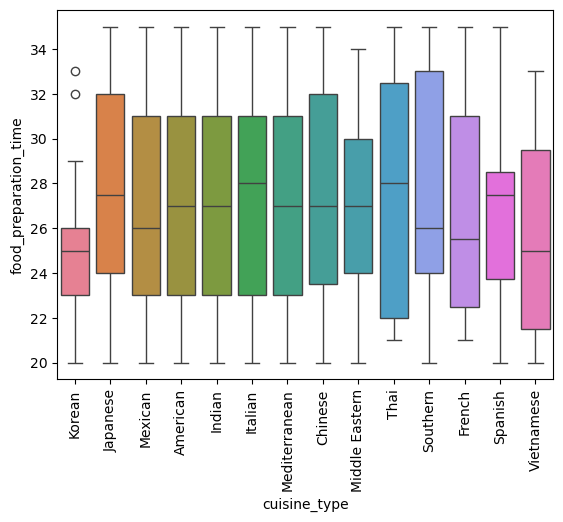

In [83]:
#Box plot to to visually compare the distribution data between cuisine_type and food_preparation_time

sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', hue='cuisine_type')
plt.xticks(rotation=90) 
plt.show()

#### Observations:
1. Food preparation time is very consistent for most of the cuisines.
2. Outliers are present for the food preparation time of Korean cuisine. 

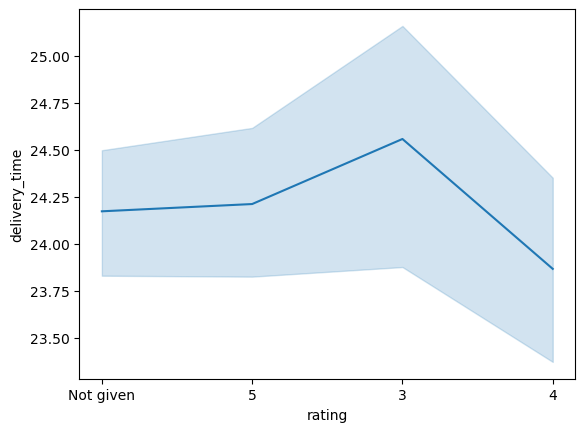

In [84]:
sns.lineplot(data = df, x = 'rating', y = 'delivery_time')
plt.show()

#### Observations:
1. Orders with a rating of 3 have the highest average delivery time
2. Delivery time seems to drop for orders rated 4.
3. Ratings of 5 and "Not given" are very similar delivery time

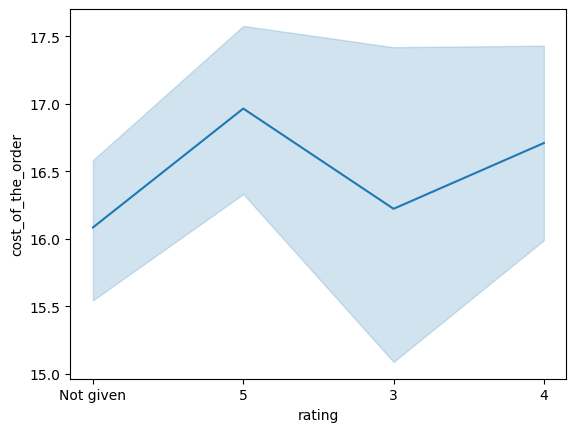

In [85]:
sns.lineplot(data = df, x = 'rating', y = 'cost_of_the_order')
plt.show()

#### Observations:
1. Orders with a rating of 5 have the highest avg cost suggesting more expensive orders gets higher rating
2. There is a dip in average cost for orders rated 3
3. The shaded band is widest for rating 3, meaning high variation in order costs 

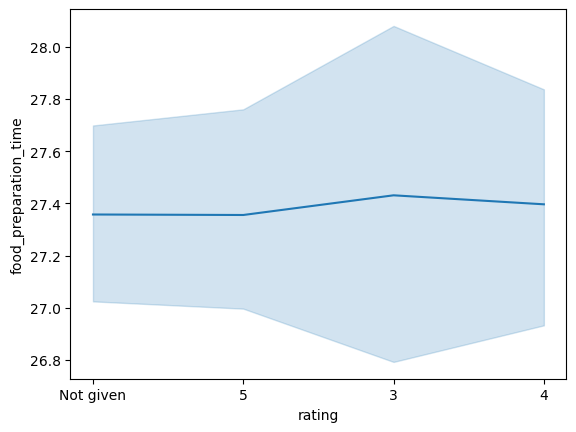

In [86]:
sns.lineplot(data = df, x = 'rating', y = 'food_preparation_time')
plt.show()

#### Observation:
1. The average preparation time is around 27.4 minutes for all rating categories.
2. Slight Peak at Rating 3
3. The shaded band is widest for rating 3, meaning high variation in food_preparation_time 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [87]:
#Display dataset 
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [88]:
#get unique values in Rating column 
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

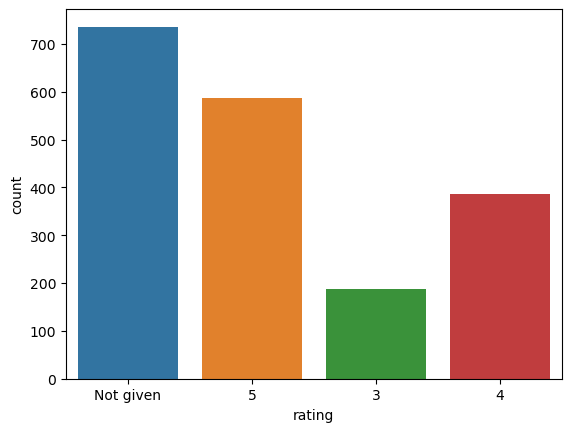

In [89]:
#plot the ratings column
sns.countplot(data=df, x='rating', hue='rating');

In [90]:
#create new DF with data not equal "Not given"
df_given = df[df['rating'] != 'Not given']
df_given.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


In [91]:
#check unique values in df_given
df_given.rating.unique()

array(['5', '3', '4'], dtype=object)

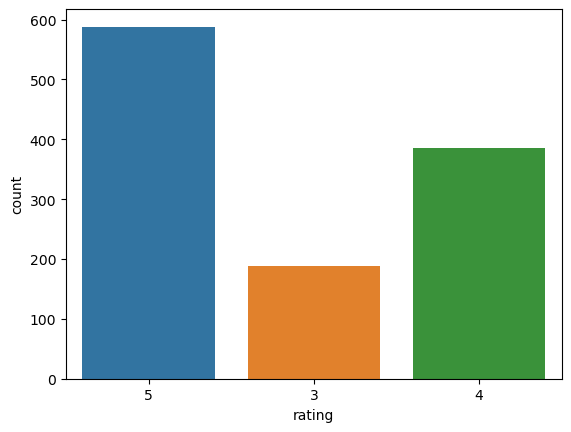

In [92]:
#check countplot of the new dataframe
sns.countplot(data=df_given, x='rating', hue='rating');

In [93]:
#convert rating column to numeric as we removed the string vlaue
df_given['rating'] = pd.to_numeric(df_given['rating'])
df_given.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


C:\Users\iamra\AppData\Local\Temp\ipykernel_11772\3330793430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_given['rating'] = pd.to_numeric(df_given['rating'])


In [94]:
#groupby restaurant_name for  all ratings, sort descending
df_count = df_given.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [95]:
#create new dataframe with all ratings > 50
gt50 = df_count[df_count['rating'] > 50]
gt50.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [96]:
#cretae DF with with all restaurant_name in gt50  
df_mean = df_given[df_given['restaurant_name'].isin(gt50['restaurant_name'])]
df_mean.restaurant_name.unique()

array(['Blue Ribbon Fried Chicken', 'Shake Shack', 'Blue Ribbon Sushi',
       'The Meatball Shop'], dtype=object)

In [97]:
#get mean by group by restaurant_name for all ratings
df_mean_gt4 = df_mean.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()
df_mean_gt4.head()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
1. Only 4 restaurants have rating count > 50
2. From the 4 restaurants having rating count > 50, all of them have an average rating > 43. Therefore , the restaurants that  qualify for this promotional offer are :
   The Meatball Shop, 
   Blue Ribbon Fried Chicken, 
   Shake Shack, 
   Blue Ribbon Sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [98]:
#take all cost_of_the_order > 20 and calculate revenue
df3 = df[df['cost_of_the_order'] > 20]
revenue1 = df3.cost_of_the_order.sum()*25/100
print(revenue1)

3688.7275


In [99]:
# take all cost_of_the_order > 5 & <= 20 and calculate revenue
df4 = df[df['cost_of_the_order'] <= 20] 
revenue2 = df4[df4['cost_of_the_order']>5].cost_of_the_order.sum()*15/100
print(revenue2)

2477.5755000000004


In [100]:
#add both revenue
Net_revenue = revenue1 + revenue2
print(Net_revenue)

6166.303


#### Observations:
The net revenue generated by the company across all orders = $ 6166.3 

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [101]:
#Create a new column Total time
df['Total_Time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Total_Time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [102]:
#create new datfarme with values of Tatal time > 60
df2 = df[df['Total_Time'] > 60]

#Get percentage value
percentage = (len(df2)/len(df)*100)
print(percentage)

10.537407797681771


#### Observations
10.5 % of orders take more than 60 minutes to get delivered from the time the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [103]:
df.groupby(['day_of_the_week'])[['delivery_time']].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


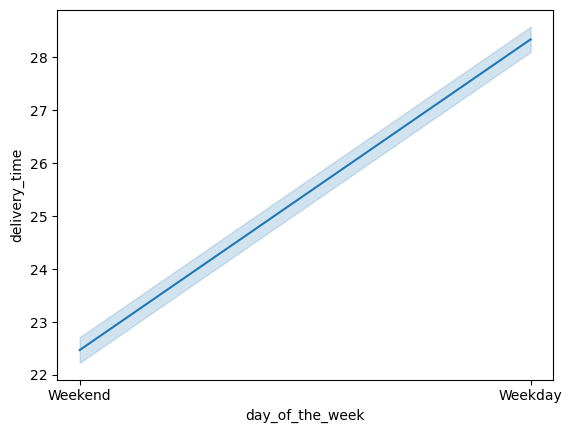

In [104]:
sns.lineplot(data = df, x = 'day_of_the_week', y = 'delivery_time')
plt.show()

#### Observations:
1. Mean delivery time of the orders on weekday = 28.340037 minutes
2. Mean delivery time of the orders on Weekend = 22.470022 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

#### Conclusions:
1. There are 1898 rows and 9 columns
2. There are no NULL values in dataset.
3. Total of 736 orders out of 1898 orders are not rated.
4. The most popular cuisines by order are : American, Japanese, Italian , Chinese
5. The top 5 restaurants in terms of the number of orders received are: Shake Shack,The Meatball Shop,Blue Ribbon Sushi,Blue Ribbon Fried Chicken,Parm
6. Delivery time seem to be lesser for weekends than weekdays.
7. Weekend shows much higer counts of ordes than weekdays.
8. The peak order counts reach more than 250 in weekends and around 150 on weekdays.
9. More no.of low cost orders are being placed on weekend.

#### Recommendations:
1. Can provide discounts to popular cuisines on weekends and weekdays.
2. Spanish and Vietnamese are the least preferred cusines. FoodHub could collaborate with these cusines restaurants to provide new and popular menus to attracts more customers.
3. Even though order placed in Weekends are more than Weekdays, we see lesser delivery time on Weekends.
       a. Create a rating system for delivery partner and provide incentive for good rated delivery partners
       b. Increase no.of delivery partners to handle to increase of order counts on weekends
       c. Increase no.of delivery partners to reduce delivery time on weekdays
4. Provide extra discounts to customers who complete rating the order
5. Promote restauarnts who maintain a good rating and quality.   